In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table                  
import seaborn as sns                       # to visualize
import pandas as pd                      
import numpy as np   
import scipy.stats as stats

In [2]:
data=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv') #loading dataset.
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
data.head(5) #printing head

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
data.tail(5) #printing tail

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
data.shape #shape of data

(10692, 13)

In [6]:
data.isnull().sum() #checking null values.

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
data.columns #all columns in dataset.

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
data.info() #info about the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [9]:
data.nunique() #getting unique values.

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

In [10]:
def dtypes(data):
    cat=[] # empty list
    num=[]
    for col in data.columns:
        if data[col]. nunique() < 6:
            cat.append(col) 
        else:
            num.append(col)
    return cat,num 
cat,num =dtypes(data)
table = [cat, num] 
print(tabulate({"Categorical":cat, "Numerical": num}, headers = ["Categorical", "Numerical"]))           

Categorical    Numerical
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [11]:
def numerical(col):
    print(f"The mean of the {col} is: {data[col].mean()}") # mean of the particular column.
    print(f"The median of the {col} is: {data[col].median()}")# median of the particular column.
    print(f"The mode of the {col} is: {data[col].mode()[0]}") # mode of the column. 
    print(f"The standard deviation of the {col} is: {data[col].std()}")# SD of the particular column.
    print(f"Number of missing values in the {col} is: {data[col].isnull().sum()}") # missing values in the column.
    skewness = stats.skew(data[col]) # getting skewness value.
    print(f"The skewness of the {col} is: {skewness}")


In [12]:
data.describe() #describing the values of numerical column.

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [13]:
def info(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is: {data[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is: {data[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe


In [14]:
info('city')
print("--------------------------------------")
info('animal')
print("--------------------------------------")
info('furniture')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is: São Paulo
Number of missing values in city is: 0
--------------------------------------
Unique values in animal are: ['acept' 'not acept']
Mode of animal is: acept
Number of missing values in animal is: 0
--------------------------------------
Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is: not furnished
Number of missing values in furniture is: 0


# Univariate Analysis

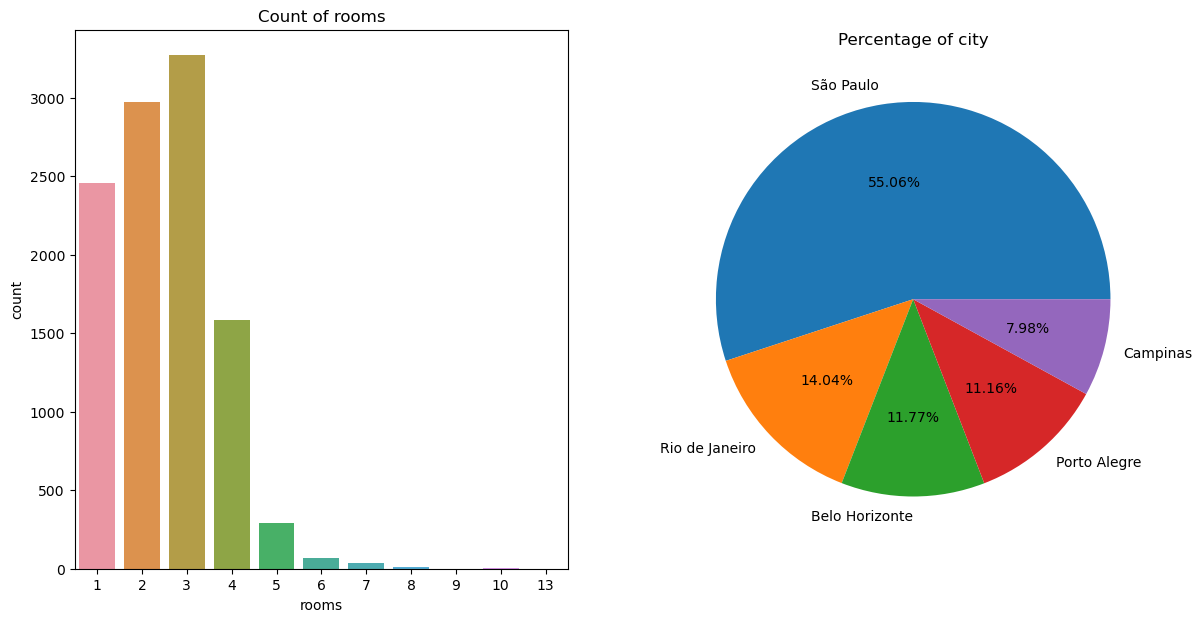

In [15]:
plt.figure(figsize=(14,7)) #size of the charts

# Subplot 1: Countplot
plt.subplot(1, 2, 1) 
plt.title("Count of rooms")  
sns.countplot(x='rooms', data=data) # x represents the column in the data.

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
plt.title("Percentage of city")  
attrition_counts = data['city'].value_counts() #count of yes and no.
labels = attrition_counts.index #labels are assigned by  attrition_counts index.
plt.pie(attrition_counts, labels=labels, autopct="%0.2f%%")

plt.show()

 ###  The bedroom chart shows us that most people prefer  to stay in 3,2,1 room.

###  The chart gives us the visualization of that most people is staying in the Sao Paulo and it has the highest percentage of 55%

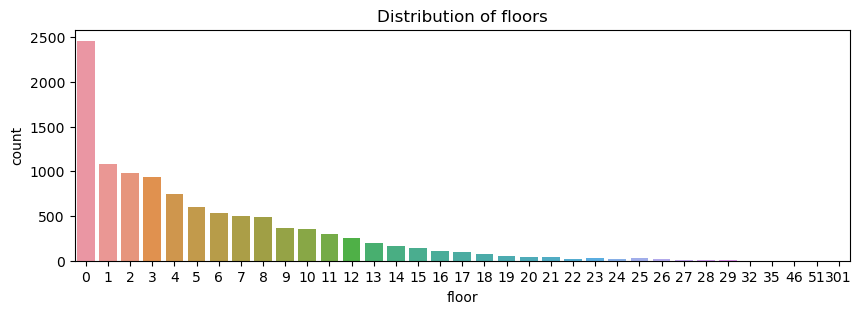

In [16]:
plt.figure(figsize=(10,3)) #size of the charts
plt.title("Distribution of floors")   #title of chart.
sns.countplot(x='floor', data=data)
plt.show()

### From the given it is analyzed that most people prefer to stay in the ground floor.

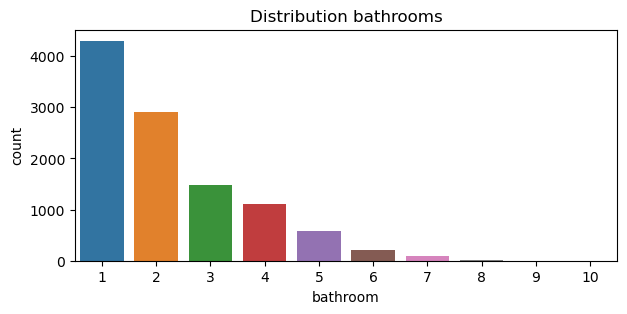

In [45]:
plt.figure(figsize = (7,3)) #fig size 
sns.countplot(x=data['bathroom'],data=data)
plt.title("Distribution bathrooms")
plt.show()


## Most people prefer houses with 1 bathroom and some with 2 and more.

<Axes: xlabel='area'>

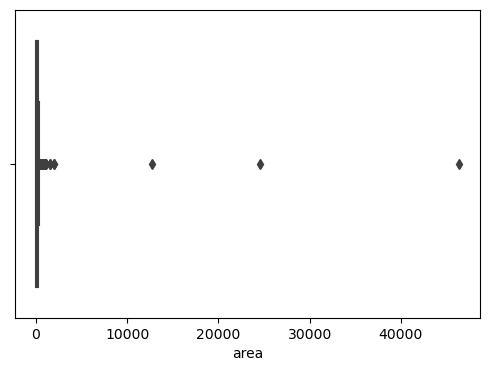

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data.area)

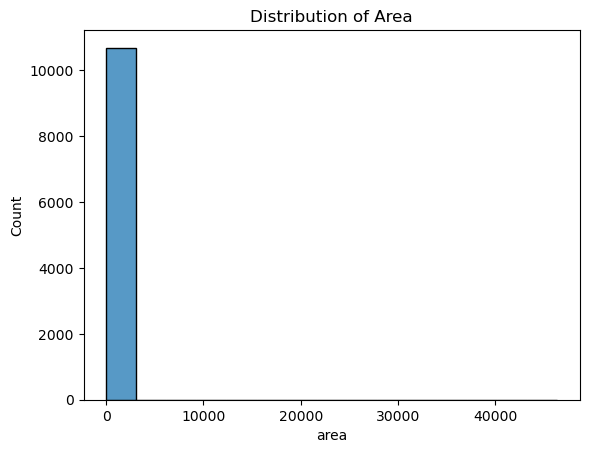

In [18]:
sns.histplot(data['area'],bins= 15)
plt.title("Distribution of Area") #title 
plt.show()

### Most people stay in area below 1000 and there are outliers in the area.We may also perform outliers treatment for better visuals.

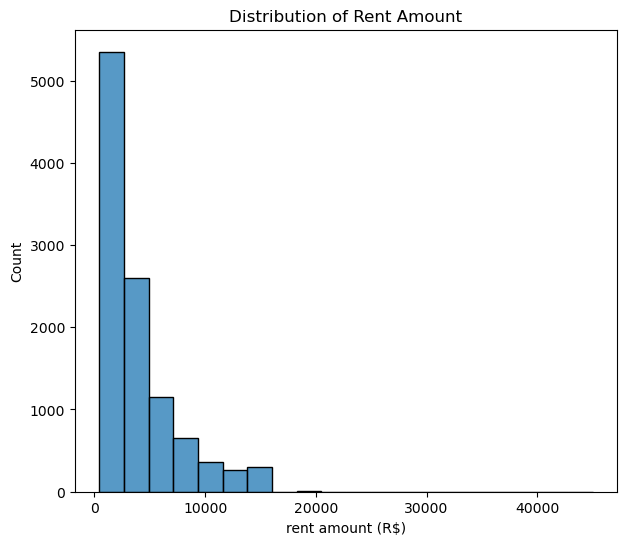

In [19]:
# Visualize the distribution of rent amount
plt.figure(figsize=(7, 6))
sns.histplot(data['rent amount (R$)'],bins =20) #creating histogram with bins.
plt.title('Distribution of Rent Amount')
plt.show()

###  We have a right skewed distribution because of the values above 2000.

# Bi-Variate Analysis

In [20]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


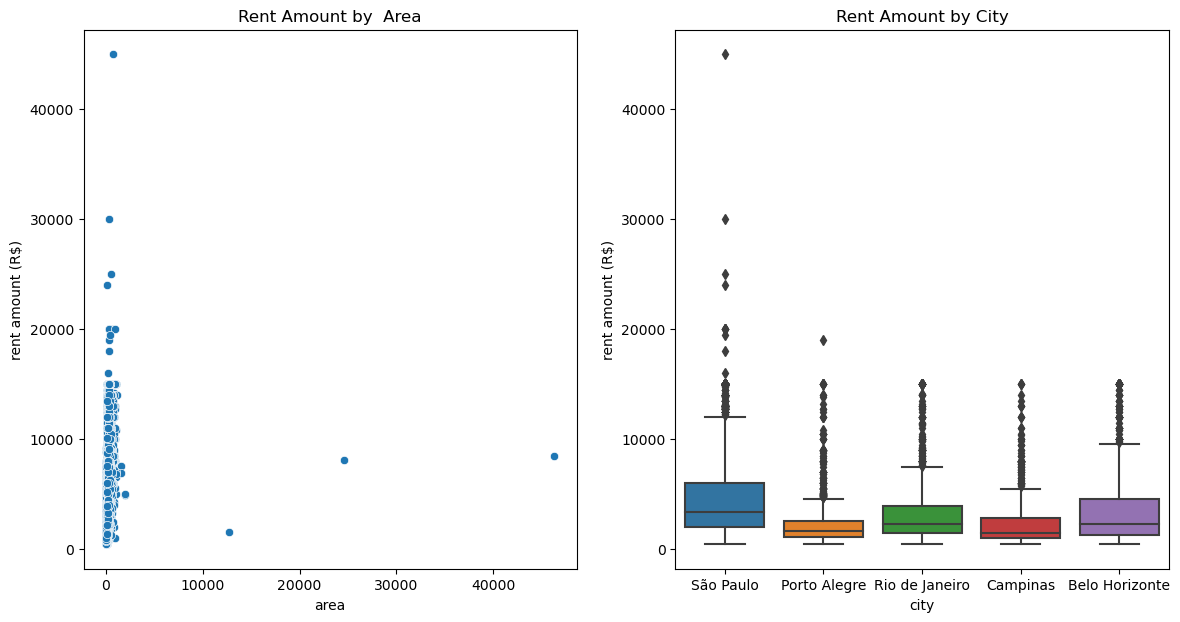

In [21]:
# Scatter plot for rent amount by area
plt.figure(figsize=(14,7)) #size of the charts
plt.subplot(1,2,1)
sns.scatterplot(x='area', y='rent amount (R$)', data=data)
plt.title('Rent Amount by  Area')

# Box plot for rent amount by city
plt.subplot(1,2,2)
sns.boxplot(x='city', y='rent amount (R$)', data=data)
plt.title('Rent Amount by City')
plt.show()


### There are outliers found in the city with rental amount.Most people prefer to stay in lower rental rate with less area.

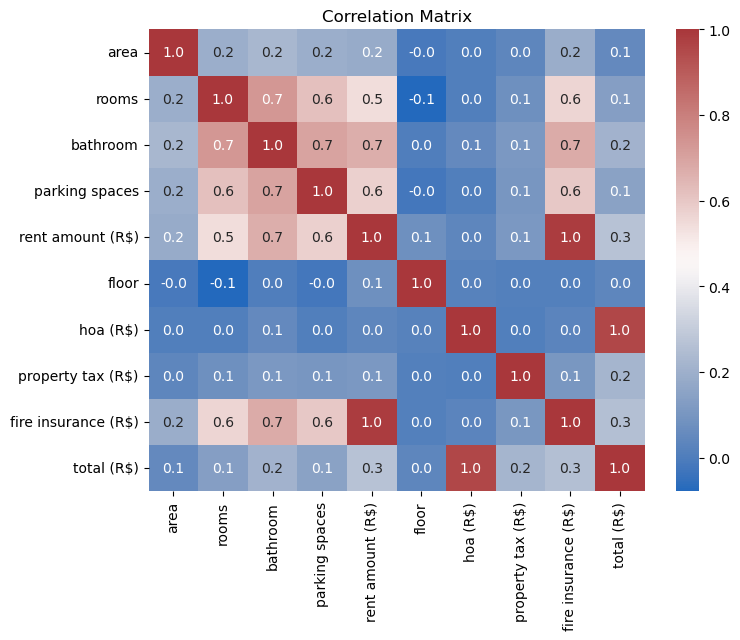

In [22]:
import warnings #importing warnings to avoid errors.
warnings.filterwarnings('ignore')
# Correlation matrix
plt.figure(figsize=(8,6))
correlation_matrix = data[['area', 'rooms', 'bathroom', 'parking spaces', 'rent amount (R$)','floor','hoa (R$)', 'property tax (R$)','fire insurance (R$)','total (R$)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

city
São Paulo         6380.831833
Belo Horizonte    6315.242448
Rio de Janeiro    4611.684877
Campinas          3173.276671
Porto Alegre      2989.782900
Name: total (R$), dtype: float64


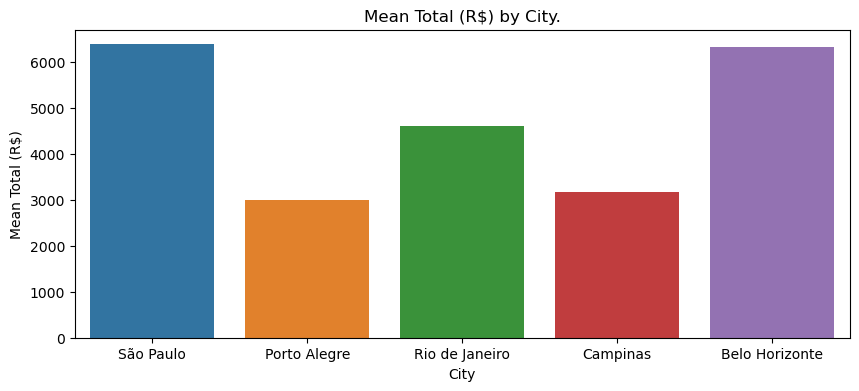

In [36]:
ds = data.groupby('city')['total (R$)'].mean().sort_values(ascending=False) #grouping the city.
print(ds)
plt.figure(figsize=(10, 4)) #figsize.
sns.barplot(x='city', y='total (R$)', data=data,ci=None) #plotting the bar chart.
plt.xlabel('City')
plt.ylabel('Mean Total (R$)')
plt.title('Mean Total (R$) by City.')
plt.show()

### We can notice that São Paulo , Rio de janeiro , Belo Horizonte have the highest total values.

animal
acept        4019.685786
not acept    3464.212121
Name: rent amount (R$), dtype: float64


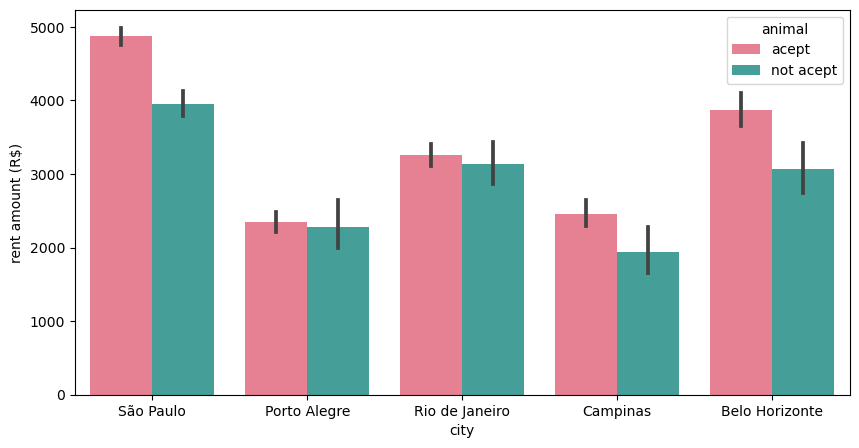

In [39]:
city = data.groupby('animal')['rent amount (R$)'].mean() #grouping and getting mean value.
print(city)
plt.figure(figsize= (10,5))
sns.barplot(x= data['city'], y= data['rent amount (R$)'],hue=data['animal'] ,palette='husl'); #plotting the bar chart.

## Analysing by city we can notice that not all cities have highier prices for animal.

# Multivariate Analysis

In [25]:
#printing city and rooms in the cross tab and getting mean.
cross_tab = pd.crosstab(index=data['city'], columns=data['rooms'], values=data['rent amount (R$)'], aggfunc='mean') 
cross_tab

rooms,1,2,3,4,5,6,7,8,9,10,13
city,,,,,,,,,,,
Belo Horizonte,1438.666667,1610.625874,2856.565553,5968.640379,7925.384615,7975.550000,8967.692308,7500.0,NaN,5500.0,NaN
Campinas,1196.825688,1416.229249,2900.431734,5307.186813,6711.071429,4850.000000,7600.000000,NaN,NaN,NaN,NaN
Porto Alegre,1357.516043,1718.405660,3413.381271,5120.419355,6208.818182,6088.888889,6000.000000,8550.0,NaN,NaN,NaN
Rio de Janeiro,1785.844059,2446.699234,4191.507109,6697.085938,8282.666667,8266.666667,13000.000000,NaN,NaN,NaN,15000.0
São Paulo,2500.348624,3020.322819,5278.566737,7893.111336,8792.487179,7787.625000,8374.705882,12300.0,12000.0,9615.0,NaN


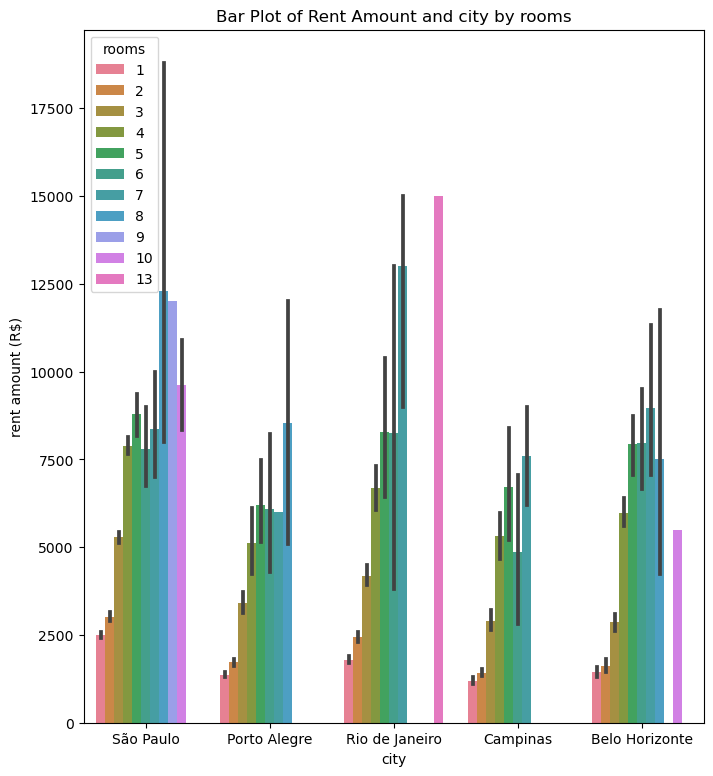

In [40]:
plt.figure(figsize= (8,9))
sns.barplot(x= data['city'], y= data['rent amount (R$)'],hue=data['rooms'] ,palette='husl');
plt.title('Bar Plot of Rent Amount and city by rooms')
plt.show()

### We can see that most people stay according to the rental cost and also people buy  13 room houses according the city too .

rooms
13    15000.000000
9     12000.000000
8      9872.727273
7      8865.277778
10     8243.333333
5      8227.239583
6      7466.397059
4      7155.170240
3      4482.279596
2      2462.187227
1      2027.854931
Name: rent amount (R$), dtype: float64


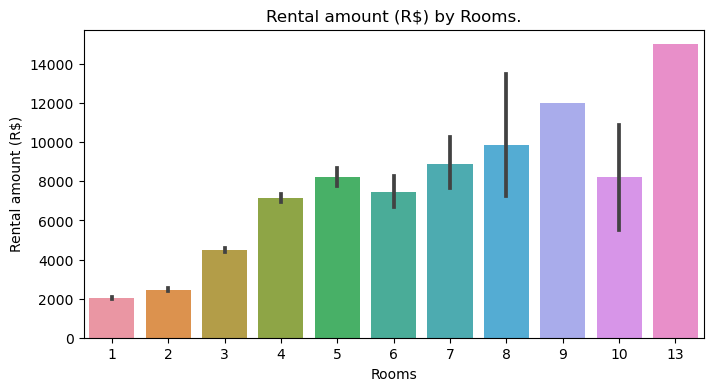

In [27]:
ds=data.groupby('rooms')['rent amount (R$)'].mean().sort_values(ascending=False) # group by rooms and getting mean for rent amount.
print(ds)

plt.figure(figsize=(8, 4))
sns.barplot(x='rooms', y='rent amount (R$)', data=data)
plt.xlabel('Rooms')
plt.ylabel('Rental amount (R$)')
plt.title('Rental amount (R$) by Rooms.')
plt.show()

### The people also purchase the 13 rental rooms but not very often and the amount is also very high.

furniture         furnished  not furnished
city                                      
Belo Horizonte  4756.994350    3485.185014
Campinas        2889.648649    2285.699461
Porto Alegre    3026.949843    2086.131579
Rio de Janeiro  4227.091133    2864.283105
São Paulo       5573.575016    4311.199814


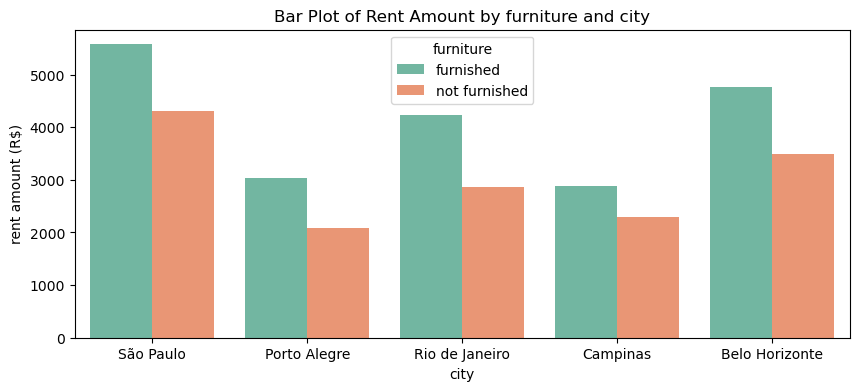

In [66]:
cross_tab = pd.crosstab(index=data['city'], columns=data['furniture'], values=data['rent amount (R$)'], aggfunc='mean')
print(cross_tab)
plt.figure(figsize=(10, 4))
sns.barplot(x='city', y='rent amount (R$)', hue='furniture', data=data,ci=None,palette='Set2')
plt.title('Bar Plot of Rent Amount by furniture and city')
plt.show()

### We can see that the cities rental costs is higher where they also sell the rooms with fully furnished.

In [29]:
pivot_table = data.pivot_table(index='city', columns='parking spaces', values='rent amount (R$)')
pivot_table

parking spaces,0,1,2,3,4,5,6,7,8,10,12
city,,,,,,,,,,,
Belo Horizonte,2472.606218,1636.944578,3386.956954,5538.039735,7595.093458,8516.757576,9370.370370,8775.714286,8072.391304,NaN,NaN
Campinas,1411.500000,1377.741602,2725.594118,4809.909091,5884.137931,6650.000000,7104.285714,NaN,6749.411765,NaN,NaN
Porto Alegre,1438.737443,1825.614537,3380.206030,6508.872340,6361.135135,7266.666667,5908.000000,3500.000000,7000.000000,NaN,NaN
Rio de Janeiro,2232.583211,3103.714286,6553.302326,7545.100000,6902.750000,5475.000000,NaN,NaN,4500.000000,NaN,NaN
São Paulo,2384.848560,3125.222912,4956.155664,6673.879310,8077.587826,8481.514620,8977.330645,10192.500000,9396.587500,8950.0,6900.0


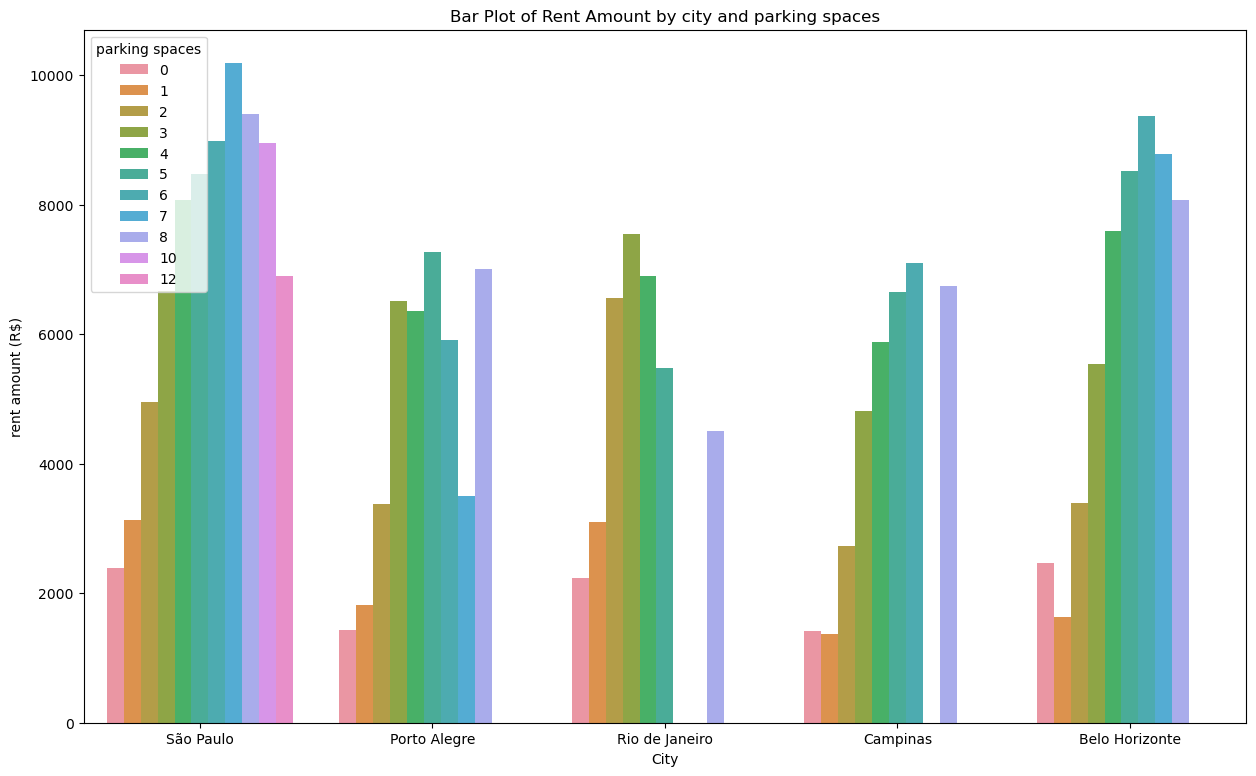

In [34]:
plt.figure(figsize= (15,9))
sns.barplot(x= data['city'], y= data['rent amount (R$)'],hue=data['parking spaces'],ci=None);
plt.xlabel('City')
plt.ylabel('rent amount (R$)')
plt.title('Bar Plot of Rent Amount by city and parking spaces')
plt.show()

### Most people prefer less rental amount with more parking space.

parking spaces
7     9486.363636
10    8950.000000
6     8867.846626
8     8704.325203
5     8278.117391
4     7752.551331
12    6900.000000
3     6430.960744
2     4525.238647
1     2602.666116
0     2140.854268
Name: rent amount (R$), dtype: float64


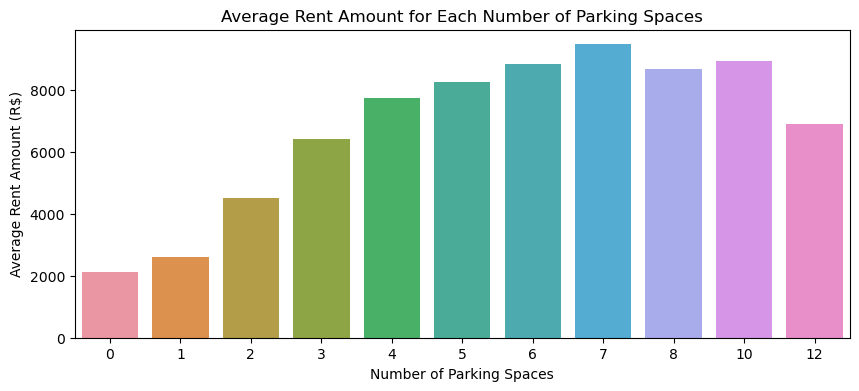

In [32]:
pr=data.groupby('parking spaces')['rent amount (R$)'].mean().sort_values(ascending = False)
print(pr)
plt.figure(figsize=(10,4))
sns.barplot(x=pr.index, y=pr.values)
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Average Rent Amount (R$)')
plt.title('Average Rent Amount for Each Number of Parking Spaces')
plt.show()

### From 0 to 7 the number of parking spaces impact on prices , just when we have 8 parking spaces the value is a little bit lower than 7 and 10 parking spaces.

In [47]:
pivot_table = data.pivot_table(index='city', columns='bathroom', values='rent amount (R$)')
pivot_table

bathroom,1,2,3,4,5,6,7,8,9,10
city,,,,,,,,,,
Belo Horizonte,1348.034146,2623.197861,4685.638009,7066.736842,8568.611111,10319.375000,10024.692308,7910.000000,NaN,7000.0
Campinas,1208.202733,2037.602804,3734.659574,5687.674419,6173.621622,8355.625000,9255.000000,NaN,NaN,NaN
Porto Alegre,1348.180000,2452.242075,4336.567568,6345.525424,6680.375000,10133.333333,5600.000000,13500.000000,NaN,NaN
Rio de Janeiro,1907.476902,3582.495256,5353.671053,8732.000000,7734.210526,9249.222222,12166.666667,NaN,NaN,NaN
São Paulo,2238.818490,3904.847376,5907.289062,7241.305725,8611.209677,8952.098684,10717.245614,13442.857143,10092.25,15000.0


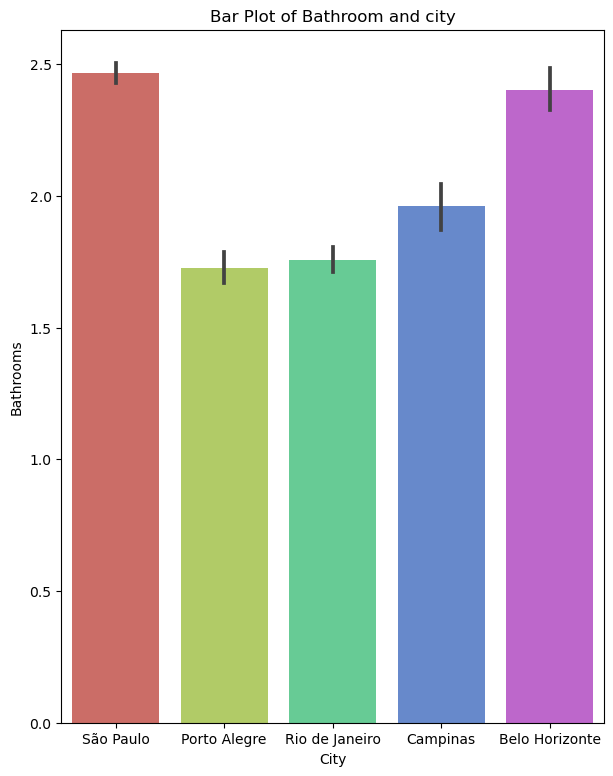

In [63]:
plt.figure(figsize= (7,9))
sns.barplot(x= data['city'], y= data['bathroom'],palette="hls");
plt.xlabel('City')
plt.ylabel('Bathrooms')
plt.title('Bar Plot of Bathroom and city')
plt.show()

## This shows that city Sao Paulo and Belo Horizonte has highest bathroom counts

# Conclusion:

##  Best Cities for Bachelors:

 As bachelors may prefer (1-room,1 bathroom and parking space).
 
São Paulo,Rio de Janeiro,Campinas,Porto Alegre: As one of the best cities in Brazil.
These Cities has (lower/higher)rent amounts and suitable amenities and other than Campinas city ,other  cities  accept animals  so this may be preferable. 

## Best Cities for Mid-sized Families:

They may prefer (3-rooms ,2 bathrooms ,2-Parking space)

Belo Horizonte,Porto Alegre,Campinas.These cities are bit moderate in price comparing rooms cost,total,parking and furnished house and even animals are allowed in theses cities.

## Best Cities for Large Families:

 They may prefer (4 or more rooms ,4 bathrooms ,3 or more Parking space)
 
 Belo Horizonte,Campinas,Porto Alegre these cities have  larger properties and they have many amenities suitable for larger families and also if people are intrested in animals they are allowed to have them.